# Consecutive dry days
 
 Highlights:
 
 - There has been little change in the mean and maximum number of consecutive dry days over the period 1951 to 2024.   

In [1]:
import os
import os.path as op
import sys
import folium

import numpy as np
import pandas as pd

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.plotting import plot_bar_probs
from ind_setup.tables import plot_df_table, table_rain_dry_summary


sys.path.append("../../../functions")
from data_downloaders import GHCN
from rain_func import consecutive_dry_days, count_consecutive_days

In [2]:
country = 'Palau'
vars_interest = ['PRCP']

## Get Data

In [3]:
update_data = False
path_data = "../../../data"

In [4]:
if update_data:
    df_country = GHCN.get_country_code(country)
    print(f'The GHCN code for {country} is {df_country["Code"].values[0]}')

    df_stations = GHCN.download_stations_info()
    df_country_stations = df_stations[df_stations['ID'].str.startswith(df_country.Code.values[0])]
    print(f'There are {df_country_stations.shape[0]} stations in {country}')

## Using Koror Station

In [5]:
if update_data:
    GHCND_dir = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    id = 'PSW00040309' # Koror Station
    dict_prcp = GHCN.extract_dict_data_var(GHCND_dir, 'PRCP', df_country_stations.loc[df_country_stations['ID'] == id])[0]
    data = dict_prcp[0]['data']#.dropna()
    data.to_pickle(op.join(path_data, 'GHCN_precipitation.pkl'))
else:
    data = pd.read_pickle(op.join(path_data, 'GHCN_precipitation.pkl'))

In [6]:
threshold = 1 #Threshold for dry and wet day
data = data.groupby(data.index.year).filter(lambda x: len(x) >= 300).dropna()
data['dry_day'] = np.where(data['PRCP'] < threshold, 1, 0)

In [7]:
consecutive_dry_year = data.groupby(data.index.year)['dry_day'].apply(consecutive_dry_days)
data['below_threshold'] = data['PRCP'] < threshold
data['consecutive_days'] = count_consecutive_days(data['below_threshold'])

(<Figure size 1200x500 with 1 Axes>,
 <Axes: ylabel='Mean consecutive dry days [< 1mm]'>)

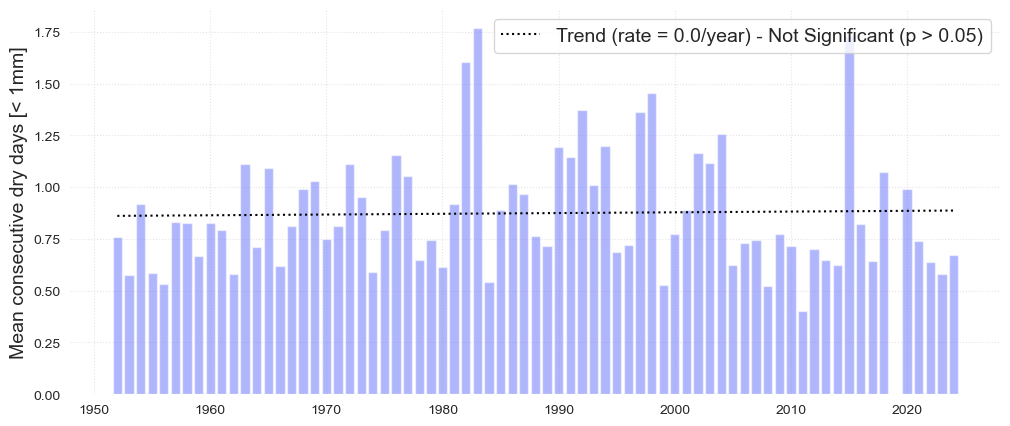

In [8]:
plot_bar_probs(np.unique(data.index.year), data.groupby(data.index.year)['consecutive_days'].mean(), 
               trendline =True, y_label = 'Mean consecutive dry days [< 1mm]',
               figsize = [12, 5])


(<Figure size 1200x500 with 1 Axes>,
 <Axes: ylabel='Maximum consecutive dry days [< 1mm]'>)

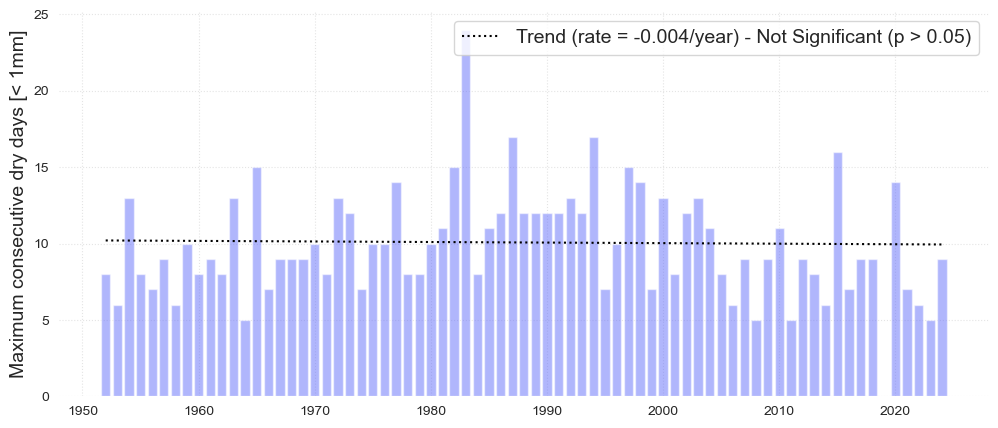

In [9]:
plot_bar_probs(np.unique(data.index.year), data.groupby(data.index.year)['consecutive_days'].max(), 
               trendline =True, y_label = 'Maximum consecutive dry days [< 1mm]',
               figsize = [12, 5])

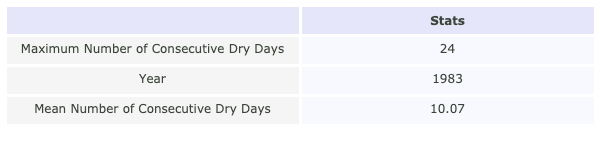

In [11]:
df = table_rain_dry_summary(data)
fig = plot_df_table(df.T, figsize = (600, 150),)